#✅ Train a Sentiment Classifier Using Logistic Regression + TF-IDF
Using medium-size synthetic data for binary sentiment classification (Positive / Negative).

#🎯 Objective:
Create synthetic review data with positive/negative sentiments

Preprocess the data

Convert text to TF-IDF features

Train and evaluate a Logistic Regression classifier

#🧩 Step 1: Import Required Libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


#🧾 Step 2: Create Synthetic Review Dataset

In [2]:
# Positive reviews
positive_reviews = [
    "Amazing product, I love it!",
    "Very satisfied with the quality.",
    "Highly recommend to everyone.",
    "Exceeded my expectations.",
    "Great service and fast delivery.",
    "Top-notch experience!",
    "The item works perfectly fine.",
    "Very useful and well-designed.",
    "Superb quality, worth every penny.",
    "Delighted with this purchase."
]

# Negative reviews
negative_reviews = [
    "Terrible product, broke on first use.",
    "Very disappointed with the service.",
    "Would not recommend to anyone.",
    "Poor quality and bad packaging.",
    "Didn't work as expected.",
    "Worst purchase I ever made.",
    "The item is defective and useless.",
    "Waste of money and time.",
    "Customer support was not helpful.",
    "Not satisfied at all."
]

# Combine and label
reviews = positive_reviews + negative_reviews
labels = [1] * len(positive_reviews) + [0] * len(negative_reviews)  # 1 = Positive, 0 = Negative

# Create DataFrame
df = pd.DataFrame({'review': reviews, 'sentiment': labels})
df.sample(5)


,review,sentiment
1,Very satisfied with the quality.,1
13,Poor quality and bad packaging.,0
2,Highly recommend to everyone.,1
5,Top-notch experience!,1
19,Not satisfied at all.,0


#🧹 Step 3: Preprocess and Split Data

In [3]:
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    df['review'], df['sentiment'], test_size=0.3, random_state=42, stratify=df['sentiment']
)


#🔠 Step 4: Convert Text to TF-IDF Features

In [4]:
# Initialize TF-IDF vectorizer
vectorizer = TfidfVectorizer(stop_words='english')

# Fit on training data and transform
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)


#🤖 Step 5: Train Logistic Regression Classifier

In [5]:
# Train Logistic Regression model
model = LogisticRegression()
model.fit(X_train_tfidf, y_train)


LogisticRegression()

#📊 Step 6: Evaluate the Model

🔍 Classification Report:

              precision    recall  f1-score   support

           0       0.40      0.67      0.50         3
           1       0.00      0.00      0.00         3

    accuracy                           0.33         6
   macro avg       0.20      0.33      0.25         6
weighted avg       0.20      0.33      0.25         6



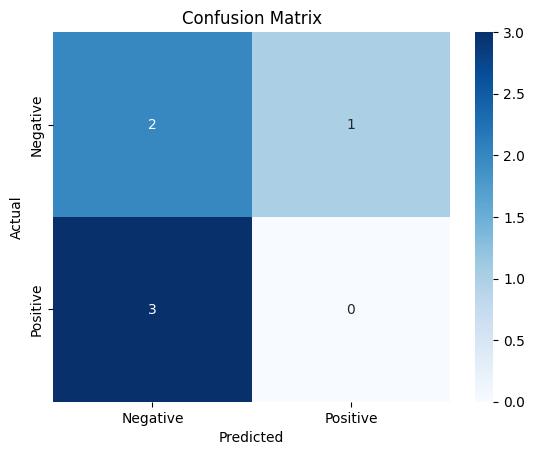

In [6]:
# Predict on test data
y_pred = model.predict(X_test_tfidf)

# Print classification report
print("🔍 Classification Report:\n")
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


# Bar Plot for Precision, Recall, F1-Score

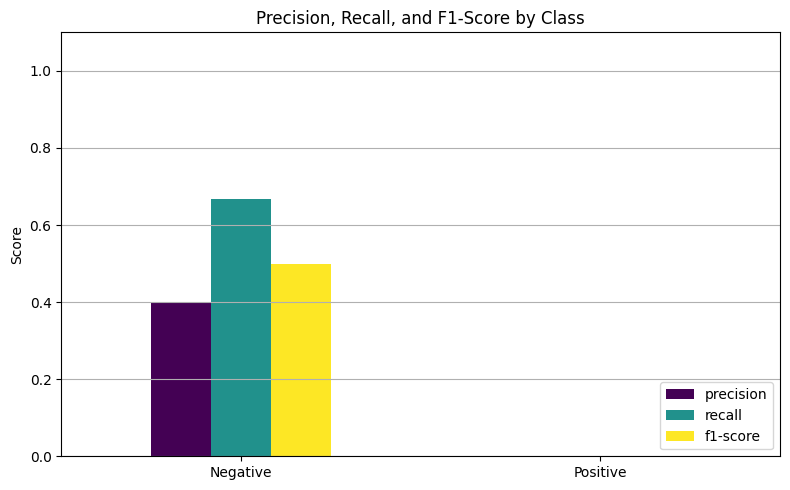

In [7]:
# Get classification report as dict
report = classification_report(y_test, y_pred, target_names=['Negative', 'Positive'], output_dict=True)

# Convert to DataFrame
metrics_df = pd.DataFrame(report).transpose().iloc[:2][['precision', 'recall', 'f1-score']]

# Plot
metrics_df.plot(kind='bar', figsize=(8, 5), colormap='viridis')
plt.title("Precision, Recall, and F1-Score by Class")
plt.ylabel("Score")
plt.ylim(0, 1.1)
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()


#Output
Confusion Matrix shows how many positive/negative reviews were correctly/incorrectly classified.

Bar Plot shows how well the model performs on both precision, recall, and F1-score.